In [1]:
from datetime import datetime
from config import AgentConfig
from dqn.agent import Agent
import pytz
import warnings
import pandas as pd

  0%|                                                 | 0/33.0 [00:00<?, ?it/s]

symbols not found
INFO:tensorflow:Restoring parameters from C:\tmp\dqn\model.ckpt-210


100%|████████████████████████████████████████| 33/33.0 [02:46<00:00,  4.57s/it]

Entire data start date: 2014-10-01
Entire data end date: 2017-06-30


Out-of-Sample Months: 29
Backtest Months: 3


Performance statistics,All history,Backtest,Out of sample
annual_return,0.07,0.26,0.05
cum_returns_final,0.21,0.06,0.14
annual_volatility,0.14,0.14,0.14
sharpe_ratio,0.57,1.67,0.45
calmar_ratio,0.36,4.75,0.28
stability_of_timeseries,0.34,0.60,0.36
max_drawdown,-0.20,-0.05,-0.20
omega_ratio,1.10,1.33,1.08
sortino_ratio,0.80,2.52,0.63
skew,-0.31,-0.12,-0.34


Worst drawdown periods,net drawdown in %,peak date,valley date,recovery date,duration
0,19.85,2015-04-15,2016-02-11,2016-08-08,344
1,5.57,2016-08-23,2016-11-03,2016-11-15,61
2,5.43,2014-10-03,2014-10-13,2014-10-24,16
3,5.15,2014-11-24,2014-12-16,2014-12-22,21
4,4.88,2014-12-29,2015-01-15,2015-02-12,34




[-0.017 -0.035]


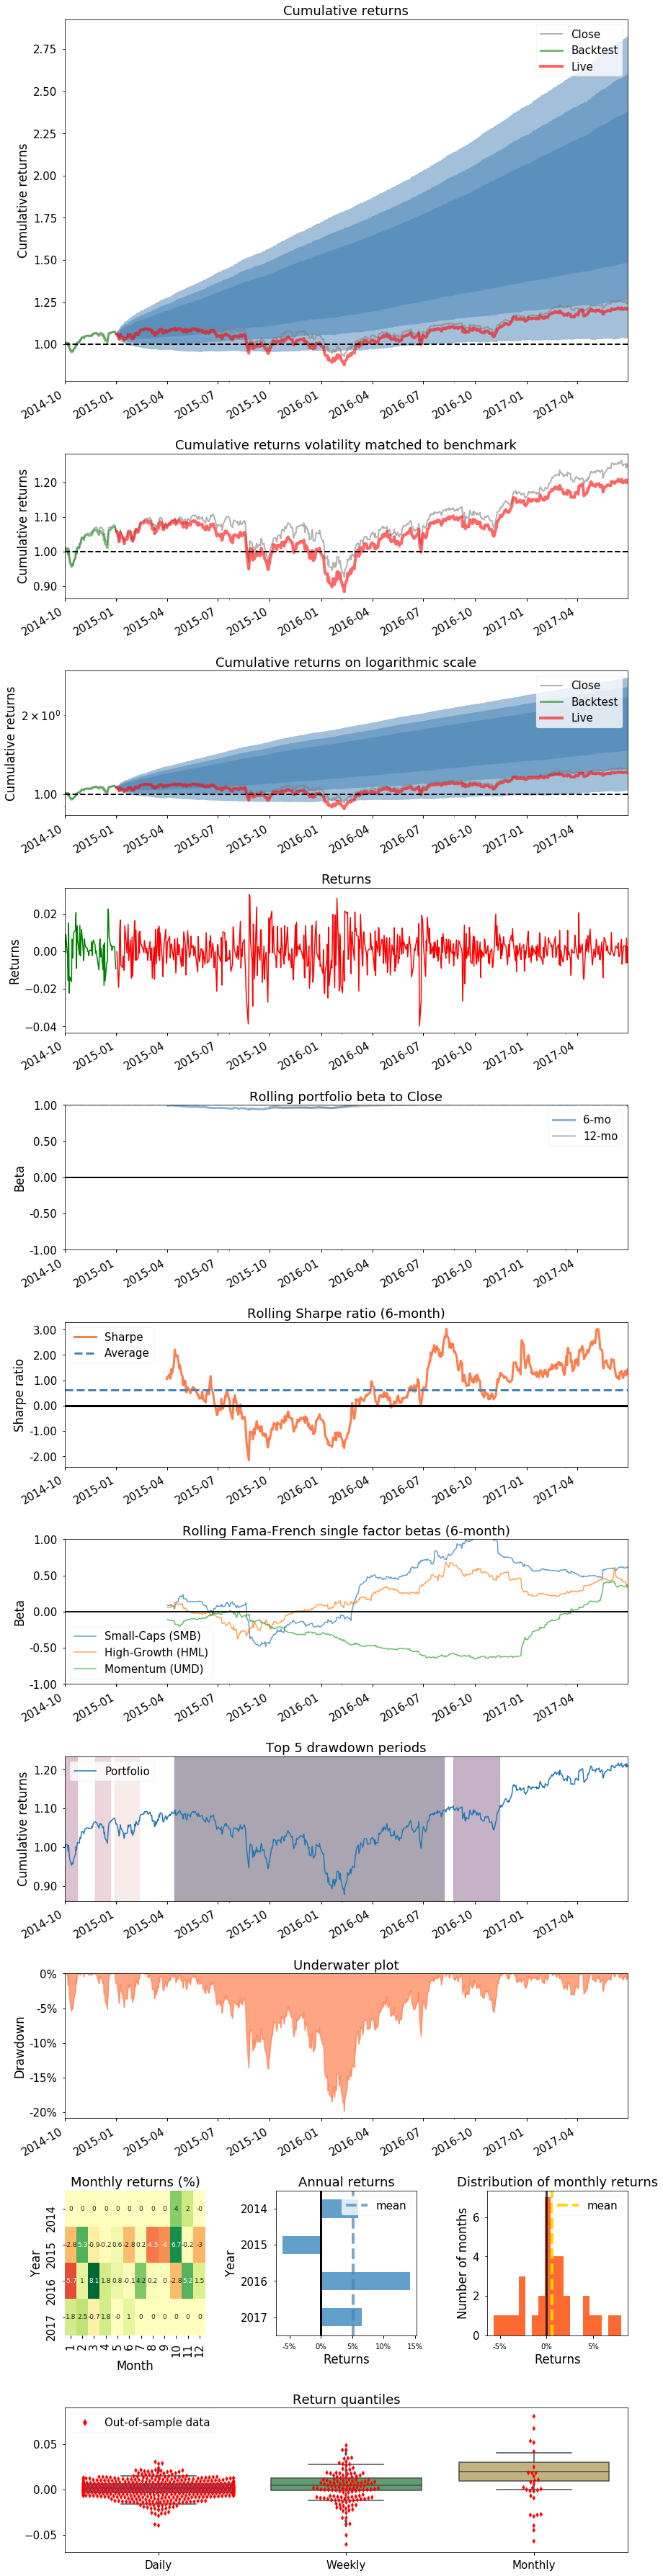

C:\Users\michael\Anaconda3\envs\portfolio-optimization\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Stress Events,mean,min,max
Oct14,0.18%,-2.23%,2.06%
Fall2015,-0.26%,-3.87%,3.03%
New Normal,0.03%,-3.98%,3.03%


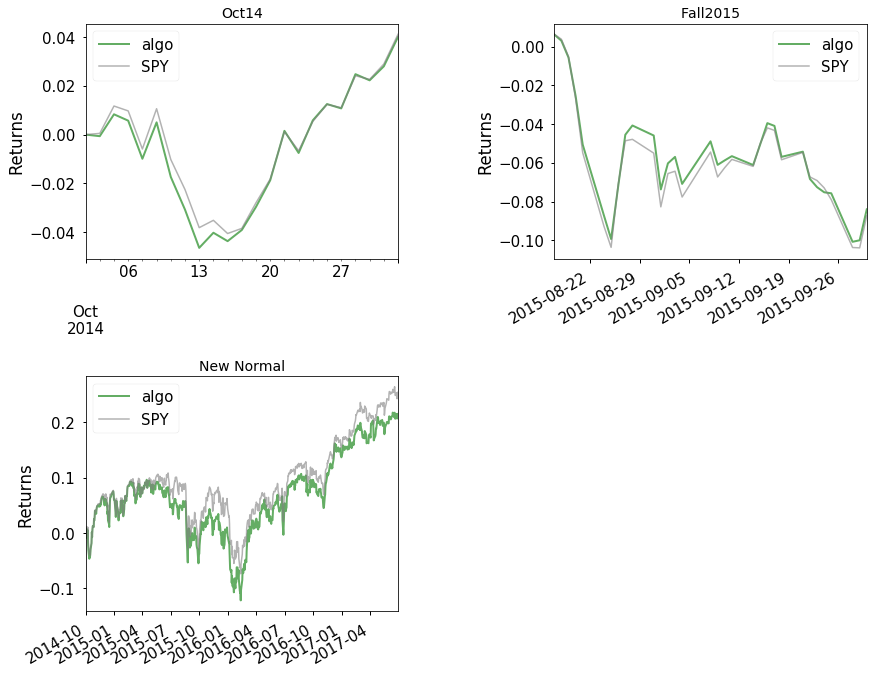

Top 10 long positions of all time,max
BTU,10.52%
AMD,1.36%
EVHC,0.72%
DNR,0.60%
WIN,0.51%
WPX,0.43%
TAP,0.42%
KRFT,0.41%
AYI,0.39%
CB,0.38%


Top 10 short positions of all time,max
AMD,-0.94%
OI,-0.03%
CB,-0.01%
GAS,-0.01%


Top 10 positions of all time,max
BTU,10.52%
AMD,1.36%
EVHC,0.72%
DNR,0.60%
WIN,0.51%
WPX,0.43%
TAP,0.42%
KRFT,0.41%
AYI,0.39%
CB,0.38%


All positions ever held,max
BTU,10.52%
AMD,1.36%
EVHC,0.72%
DNR,0.60%
WIN,0.51%
WPX,0.43%
TAP,0.42%
KRFT,0.41%
AYI,0.39%
CB,0.38%


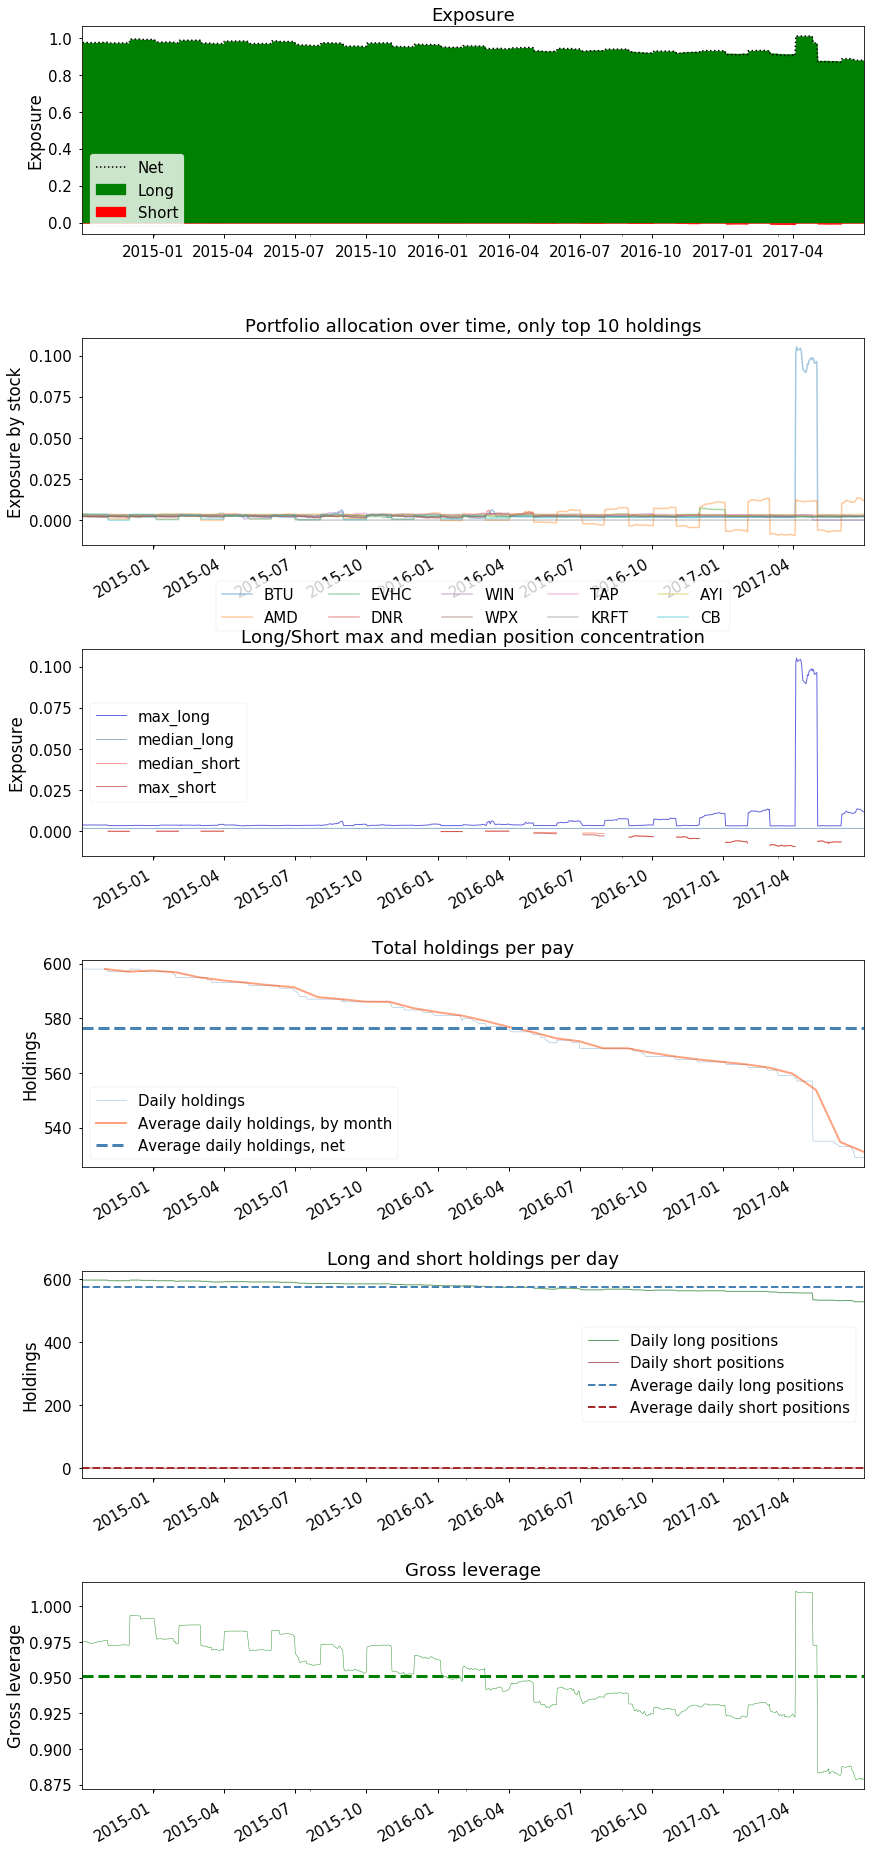

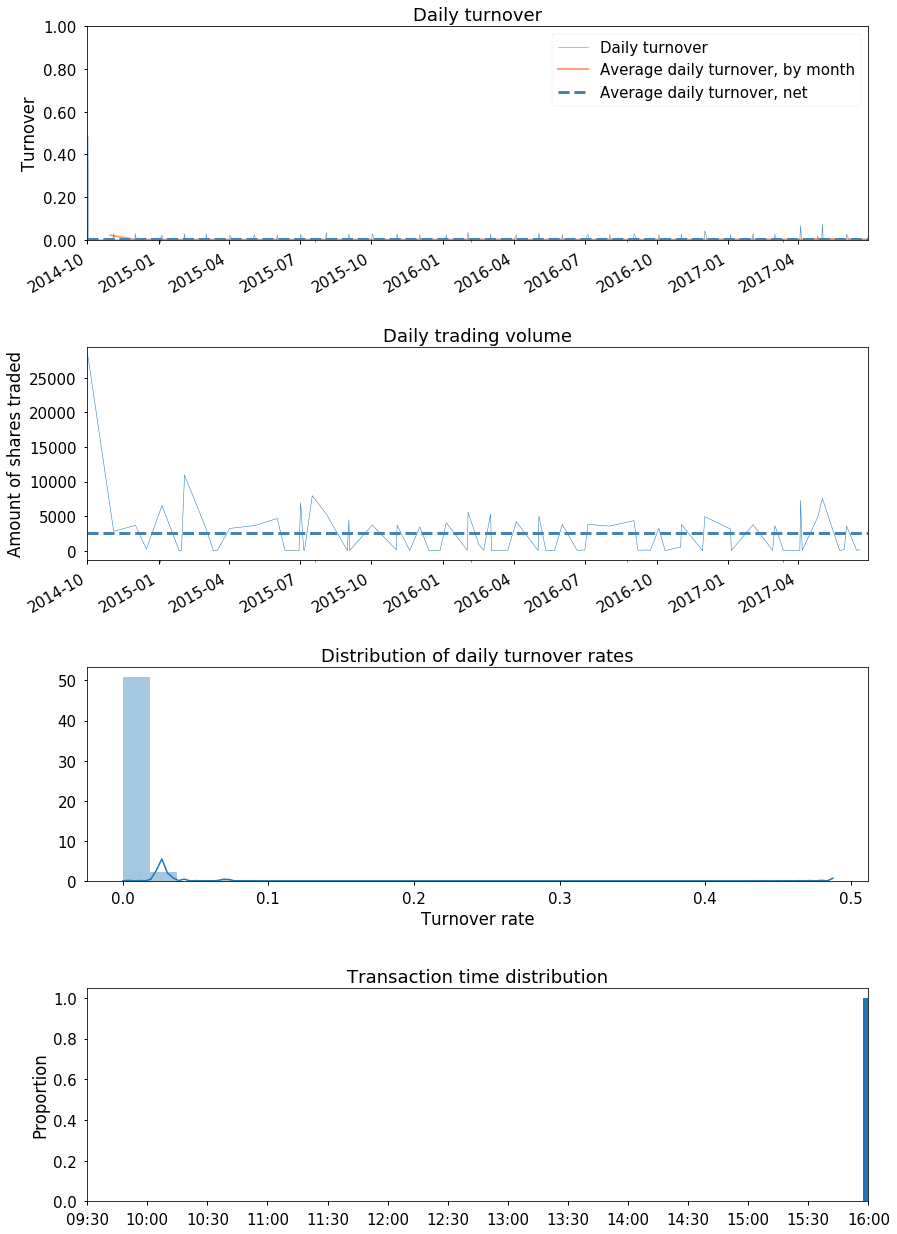

C:\Users\michael\Anaconda3\envs\portfolio-optimization\lib\site-packages\pyfolio\round_trips.py:211: UserWarning: Negative price detected, ignoring forround-trip.
  warnings.warn('Negative price detected, ignoring for'


Summary stats,All trades,Short trades,Long trades
Total number of round_trips,5676.00,17.00,5659.00
Percent profitable,0.70,0.35,0.70
Winning round_trips,3962.00,6.00,3956.00
Losing round_trips,1714.00,11.00,1703.00
Even round_trips,0.00,0.00,0.00


PnL stats,All trades,Short trades,Long trades
Total profit,$217074.67,$-2548.28,$219622.95
Gross profit,$411425.93,$528.23,$410897.70
Gross loss,$-194351.26,$-3076.51,$-191274.75
Profit factor,$2.12,$0.17,$2.15
Avg. trade net profit,$38.24,$-149.90,$38.81
Avg. winning trade,$103.84,$88.04,$103.87
Avg. losing trade,$-113.39,$-279.68,$-112.32
Ratio Avg. Win:Avg. Loss,$0.92,$0.31,$0.92
Largest winning trade,$42721.30,$287.82,$42721.30
Largest losing trade,$-27150.30,$-1008.90,$-27150.30


Duration stats,All trades,Short trades,Long trades
Avg duration,509 days 03:44:35.357117,46 days 02:45:52.941176,510 days 13:07:38.124580
Median duration,488 days 01:00:00,30 days 00:00:00,488 days 01:00:00


Return stats,All trades,Short trades,Long trades
Avg returns all round_trips,0.00%,-0.01%,0.00%
Avg returns winning,0.01%,0.01%,0.01%
Avg returns losing,-0.01%,-0.02%,-0.01%
Median returns all round_trips,0.00%,-0.00%,0.00%
Median returns winning,0.00%,0.01%,0.00%
Median returns losing,-0.00%,-0.02%,-0.00%
Largest winning trade,3.56%,0.03%,3.56%
Largest losing trade,-2.25%,-0.09%,-2.25%


Symbol stats,AAPL,ABBV,ABC,ABT,ACN,AGN,ADBE,ADI,ADM,ADP,...,JPM,UNM,PGR,TGNA,ZBH,SYF,CFG,ARNC,MAA,UAA
Avg returns all round_trips,0.01%,0.01%,0.00%,0.00%,0.01%,0.00%,0.01%,0.01%,-0.00%,0.01%,...,0.01%,0.01%,0.00%,0.00%,0.02%,0.00%,0.00%,-0.00%,0.01%,-0.00%
Avg returns winning,0.01%,0.01%,0.00%,0.00%,0.01%,0.01%,0.01%,0.01%,0.00%,0.01%,...,0.01%,0.01%,0.00%,0.00%,0.02%,0.00%,0.00%,0.01%,0.01%,0.00%
Avg returns losing,nan%,nan%,nan%,-0.00%,nan%,-0.01%,nan%,nan%,-0.00%,nan%,...,nan%,-0.00%,nan%,nan%,nan%,nan%,-0.00%,-0.01%,nan%,-0.01%
Median returns all round_trips,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,-0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.02%,0.00%,0.00%,-0.00%,0.00%,-0.00%
Median returns winning,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.02%,0.00%,0.00%,0.00%,0.00%,0.00%
Median returns losing,nan%,nan%,nan%,-0.00%,nan%,-0.00%,nan%,nan%,-0.00%,nan%,...,nan%,-0.00%,nan%,nan%,nan%,nan%,-0.00%,-0.00%,nan%,-0.01%
Largest winning trade,0.06%,0.04%,0.03%,0.01%,0.05%,0.01%,0.11%,0.05%,0.00%,0.04%,...,0.04%,0.07%,0.05%,0.00%,0.02%,0.01%,0.04%,0.01%,0.04%,0.00%
Largest losing trade,0.00%,0.00%,0.00%,-0.00%,0.00%,-0.02%,0.00%,0.00%,-0.01%,0.00%,...,0.00%,-0.00%,0.00%,0.00%,0.02%,0.00%,-0.00%,-0.03%,0.00%,-0.01%


Profitability (PnL / PnL total) per name,pnl
BTU,0.05%
NVDA,0.02%
EVHC,0.02%
AMD,0.02%
ULTA,0.01%
BSX,0.01%
AMZN,0.01%
VMC,0.01%
ATVI,0.01%
RCL,0.01%


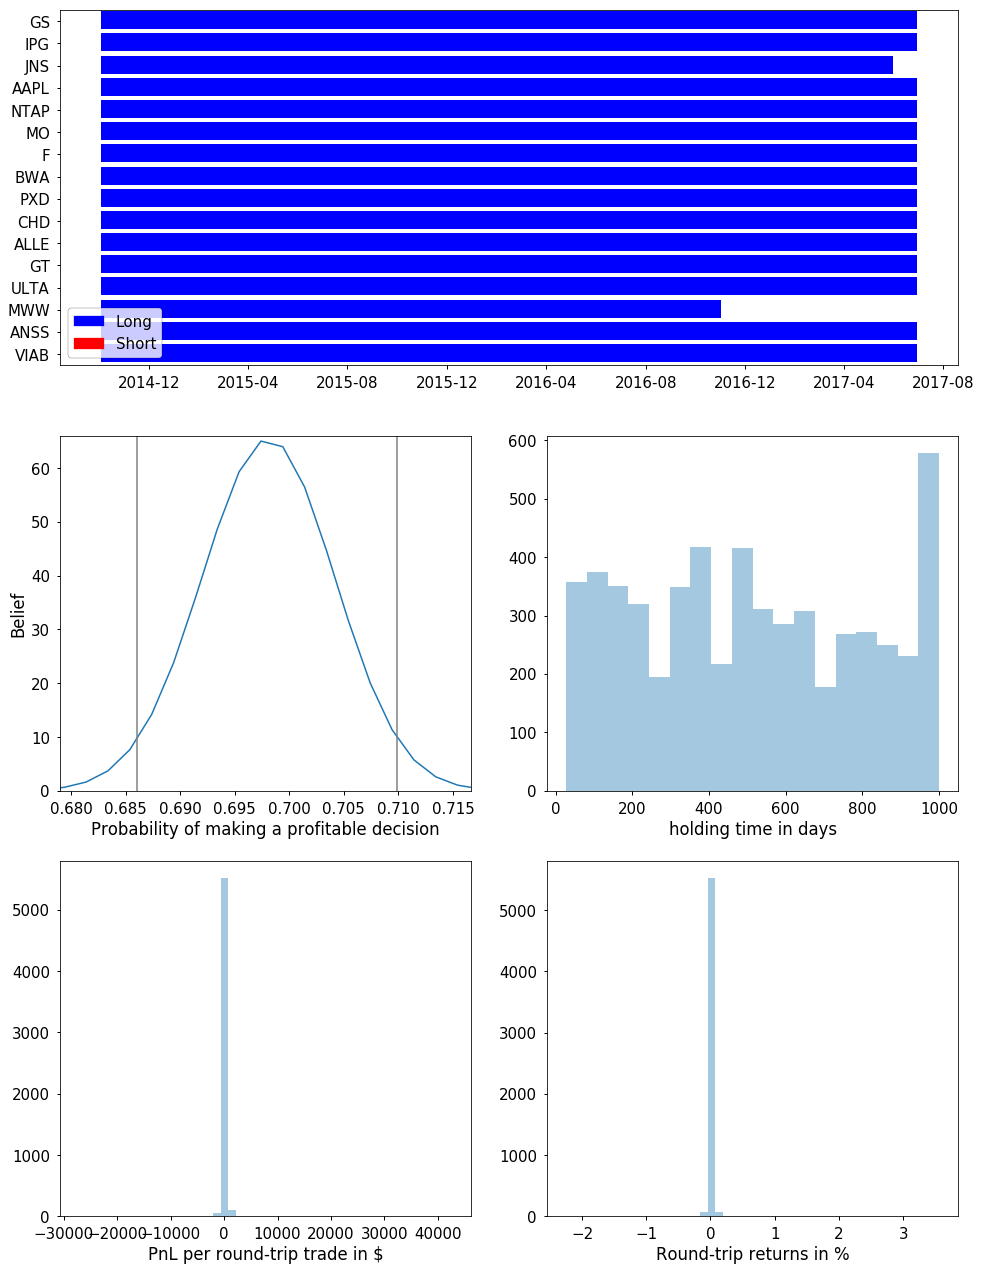

In [2]:
warnings.simplefilter("ignore", DeprecationWarning)

config = AgentConfig()

# parameters
sd = datetime(2014, 10, 1, 0, 0, 0, 0, pytz.utc)
ed = datetime(2017, 7, 1, 0, 0, 0, 0, pytz.utc)
live_start_date = datetime(2015, 1, 1, 0, 0, 0, 0, pytz.utc)

syms = pd.read_csv('sp500.csv')
syms = syms.values[:, 0].tolist()
captial = 1000000

agent = Agent(config, syms, captial)
agent.test(sd, ed, live_start_date=live_start_date, benchmark='VTI')